<a href="https://colab.research.google.com/github/MukunthanPeriyasamy/Deep_Learning_Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Input,Flatten,Dense
import cv2 as cv
from PIL import Image

In [4]:
files = zipfile.ZipFile('archive.zip')
files.extractall()

# Image Processing

In [5]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

In [6]:
print(with_mask[0:5])
print(without_mask[0:5])

['with_mask_911.jpg', 'with_mask_1832.jpg', 'with_mask_771.jpg', 'with_mask_101.jpg', 'with_mask_2386.jpg']
['without_mask_3793.jpg', 'without_mask_428.jpg', 'without_mask_2298.jpg', 'without_mask_2252.jpg', 'without_mask_2517.jpg']


In [7]:
print(f"No of with mask images : {len(with_mask)}")
print(f"No of witout mask images : {len(without_mask)}")

No of with mask images : 3725
No of witout mask images : 3828


In [8]:
with_mask_labels = [1] * len(with_mask)
without_mask_labels = [0] * len(without_mask)

In [9]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
labels = with_mask_labels + without_mask_labels

In [11]:
labels[0:5] , labels[-5:-1]

([1, 1, 1, 1, 1], [0, 0, 0, 0])

In [12]:
## Adding all the images to a list by converting and resizing the image into numpy array
import numpy as np
with_mask_path = 'data/with_mask/'

data = []

for files in with_mask:
  image = Image.open(with_mask_path + files)
  images = image.resize((224,224))
  images = images.convert('RGB')
  images = np.array(images)

  data.append(images)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
without_mask_path = 'data/without_mask/'

for files in without_mask:
  image = Image.open(without_mask_path + files)
  images = image.resize((224,224))
  images = images.convert('RGB')
  images = np.array(images)

  data.append(images)

In [14]:
len(with_mask) + len(without_mask)

7553

In [15]:
len(data)

7553

In [16]:
type(data)

list

In [17]:
type(data[0])

numpy.ndarray

In [18]:
print(data[0].shape)

(224, 224, 3)


In [19]:
x = np.array(data)
y = np.array(labels)

In [20]:
## Train test split
x_train,x_test,y_train,y_test = train_test_split(
    x,y ,test_size=0.2,random_state = 0

)

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 19,  21,  16],
        [ 18,  20,  15],
        [ 18,  20,  15],
        ...,
        [ 48,  43,  31],
        [ 60,  56,  44],
        [ 57,  53,  41]],

       [[ 15,  17,  12],
        [ 15,  17,  12],
        [ 15,  17,  12],
        ...,
        [ 37,  34,  21],
        [ 39,  36,  24],
        [ 34,  31,  19]],

       [[ 13,  15,  10],
        [ 13,  15,  10],
        [ 13,  15,  10],
        ...,
        [ 29,  27,  14],
        [ 30,  28,  15],
        [ 32,  30,  17]]], dtype=uint8)
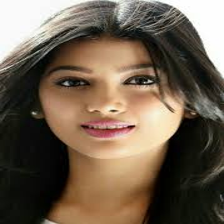

In [21]:
x_train[0]

In [22]:
y_train[0:10]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [23]:
x_train_scaled = x_train / 255
x_test_scaled  = x_test/255

# Model Building and Testing

In [40]:
## Model building

model_1 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model_1.fit(
    x_train_scaled,y_train,
    validation_data  = (x_test_scaled,y_test),
    epochs = 5,
    batch_size = 32
)

Epoch 1/5
189/189 [==============================] - 133s 695ms/step - loss: 0.3904 - accuracy: 0.8188 - val_loss: 0.2795 - val_accuracy: 0.8822
Epoch 2/5
189/189 [==============================] - 127s 671ms/step - loss: 0.2524 - accuracy: 0.8995 - val_loss: 0.2175 - val_accuracy: 0.9060
Epoch 3/5
189/189 [==============================] - 127s 672ms/step - loss: 0.2118 - accuracy: 0.9211 - val_loss: 0.1970 - val_accuracy: 0.9239
Epoch 4/5
189/189 [==============================] - 126s 668ms/step - loss: 0.1923 - accuracy: 0.9325 - val_loss: 0.1684 - val_accuracy: 0.9351
Epoch 5/5
189/189 [==============================] - 125s 663ms/step - loss: 0.1745 - accuracy: 0.9350 - val_loss: 0.1624 - val_accuracy: 0.9385


In [41]:
model_1.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 8s 172ms/step - loss: 0.1624 - accuracy: 0.9385


[0.16241930425167084, 0.93845134973526]

# Predictive System

In [65]:
def prediction():
  image = input("Enter the image path: ")
  image = mimg.imread(image)
  img = image / 255
  image = tf.image.resize(img,(224,224))
  image = tf.expand_dims(image,axis=0)
  pred = model_1.predict(image)
  print(pred)
  output = np.argmax(pred)

  if output == 1:
    print("With Mask")
  else:
    print("Without Mask")

In [67]:
prediction()

Enter the image path: /content/images (1).jpeg
1/1 [==============================] - 0s 27ms/step
[[0.00330728 0.99669266]]
With Mask
